In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

df=pd.read_csv("magic04.data",names=cols)

In [5]:

# View column names as an array
column_names = df.columns.tolist()
print(column_names)

['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']


In [6]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [93]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [7]:
df['class']=(df['class']=='g').astype(int)

In [12]:
df.head(5)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


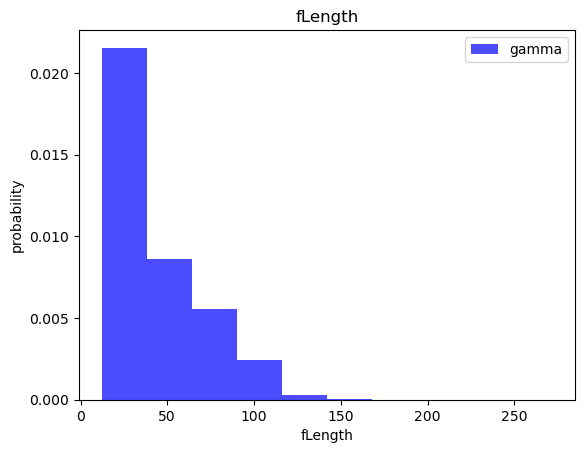

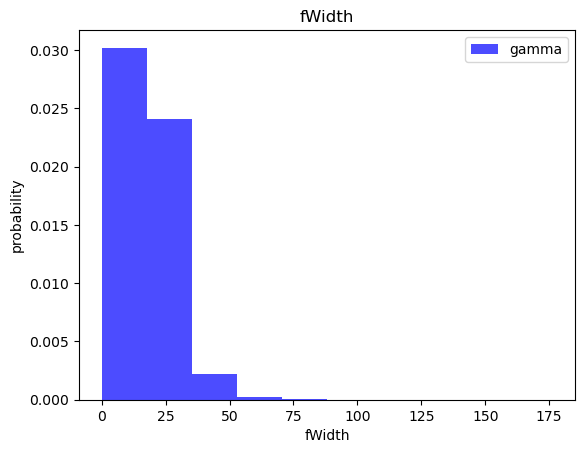

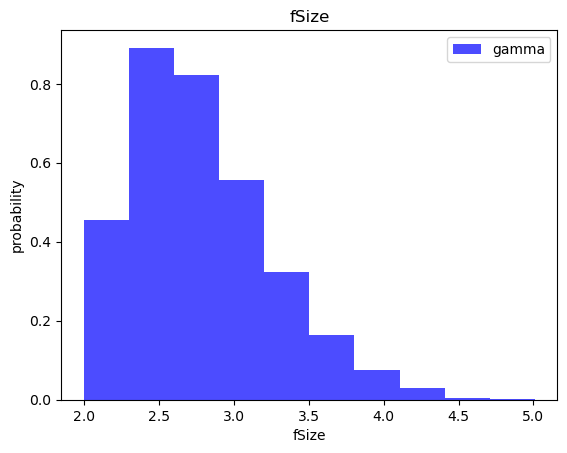

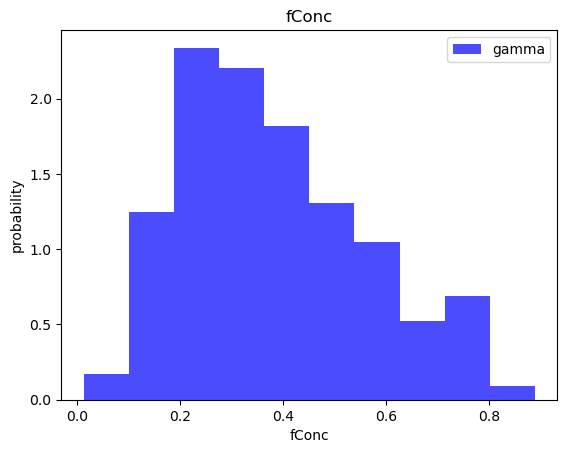

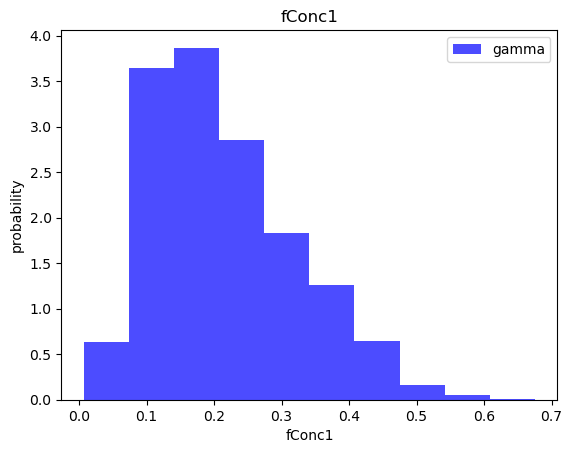

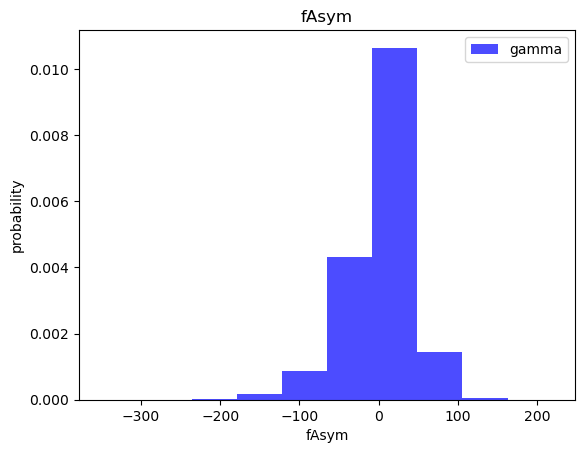

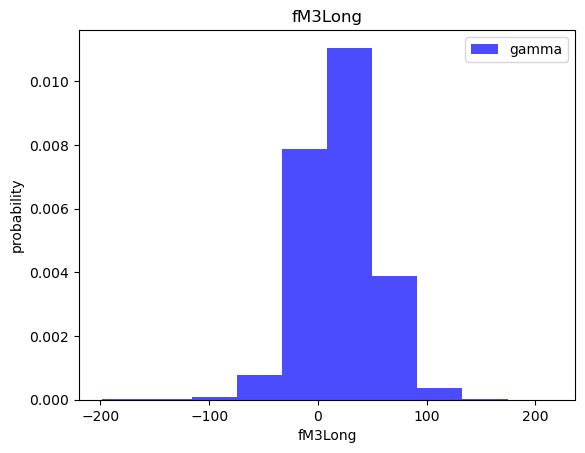

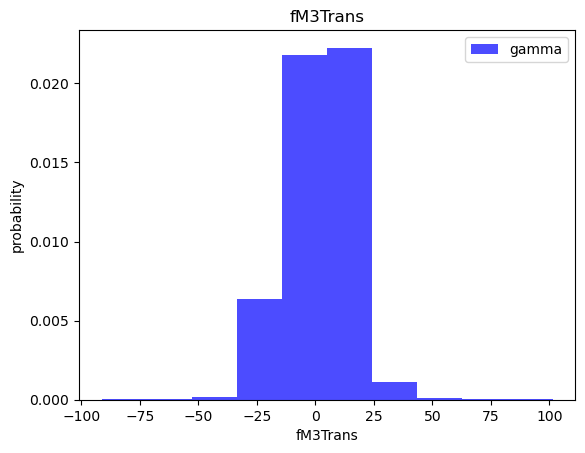

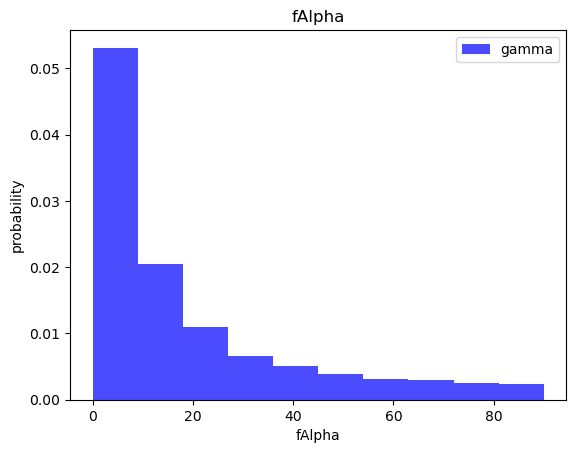

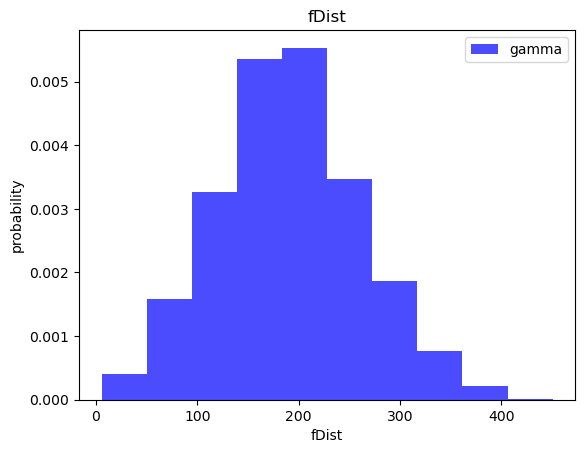

In [18]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label],color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df['class']==0][label],color='red',label='hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel("probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()




In [97]:
df.columns[:-1]
x=df[df.columns[-1]].values
print(x)

[1 1 1 ... 0 0 0]


In [98]:
train, valid, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

C:\Users\harin\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [99]:
def scale_dataset(dataFrame,oversample):
    X=df[df.columns[:-1]].values
    Y=df[df.columns[-1]].values
    scaler=StandardScaler()
    X=scaler.fit_transform(X)

    if oversample:
        ros=RandomOverSampler()
        X,Y = ros.fit_resample(X,Y)
    data=np.hstack((X,np.reshape(Y,(-1,1))))
    return data,X,Y

In [100]:
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))
print(len(train))

7395
4017
11412


In [105]:
train,X_train,Y_train=scale_dataset(train,oversample=True)
valid,X_train,Y_train=scale_dataset(valid,oversample=True)
test,X_train,Y_train=scale_dataset(test,oversample=True)